In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Bike = pd.read_csv('./Bike-Sharing-Dataset 2/hour.csv')
Bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## <font color='blue'>重新命名與刪除資料

In [53]:
del Bike['instant'] 
del Bike['dteday']
del Bike['casual']
del Bike['cnt']

Bike.rename(columns={'holiday':'is_holiday',
                     'workingday':'is_workingday',
                     'weathersit':'weather_condition',
                     'hum':'humidity',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year'},inplace=True)
 
Bike.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


KeyError: 'registered'

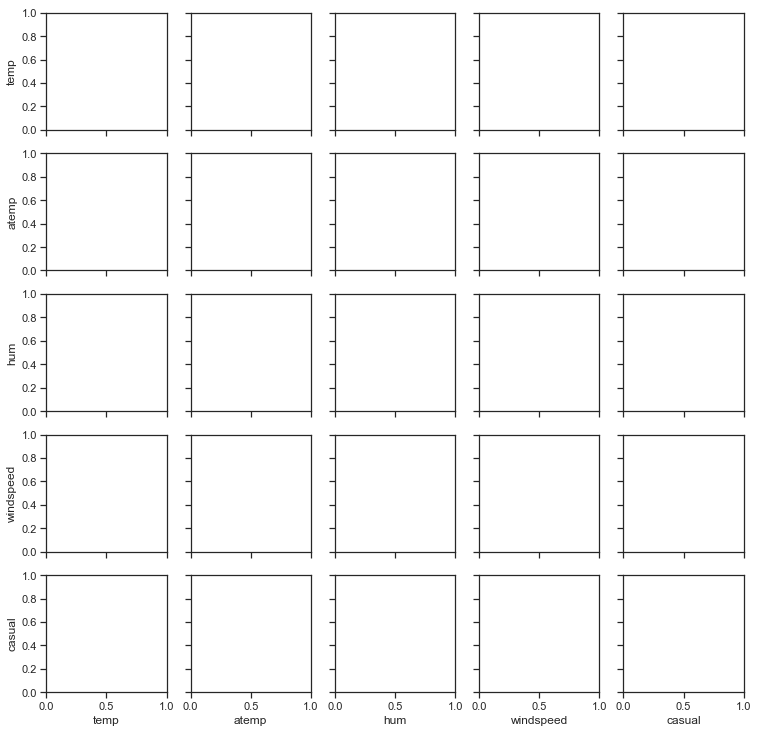

In [34]:
sns.pairplot(hue="registered", data=Bike.iloc[:,10:15])

## <font color='blue'>綜觀來看，petal_length	, petal_width 的區分效果較佳
## <font color='blue'>所以選定用來訓練模型

In [35]:
from sklearn.svm import SVC, LinearSVC

In [41]:
X = Bike.iloc[:, 3:10].values
y = ["registered"].values

AttributeError: 'list' object has no attribute 'values'

In [9]:
model = LinearSVC(random_state=555)

In [10]:
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

In [11]:
model.score(X=X, y=y)

0.9466666666666667

## <font color='blue'>準確度達到 0.95，可接受

In [12]:
predict_y = model.predict(X=X)

In [13]:
from sklearn import metrics

In [14]:
confmat = metrics.confusion_matrix(y, predict_y)
confmat

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  3, 47]])

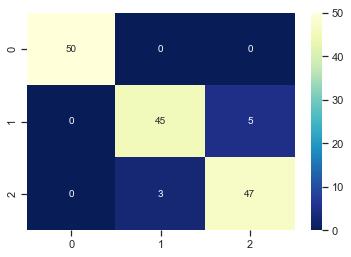

In [15]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")  

## <font color='blue'>將species的結果與預測值做比較，得到不錯的判定效果，結束